In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading dataset
df=pd.read_csv('summer.csv')

In [3]:
#head():-head() will displays top 5 rows of dataset
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
#tail():-tail() will displays last 5 rows of dataset
df.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [5]:
#checking shape of dataset
df.shape

(31165, 9)

In [6]:
#checking feature/column names
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [7]:
#checking data types of features
df.dtypes

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

In [8]:
#checking for duplicate records
df.duplicated().sum()

2

As we can see that there is 2 duplicated records.so we have to drop it

In [9]:
#dropping duplicated rows
df.drop_duplicates()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [10]:
#checking for missing/null values
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

As we can see that Country column having 4 missing values.so we have to drop this records.

In [11]:
df1=df.dropna(axis=0)

In [12]:
df1.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [13]:
df1.shape

(31161, 9)

In [14]:
df1.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

## 1. In how many cities Summer Olympics is held so far?


In [15]:
df1['City'].unique()


array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [16]:
count=0
data=[]
for city in df1['City'].unique():
    for year in df1['Year'].unique():
        if len(df1[(df1['City']==city) & (df1['Year']==year)]):
            count+=1
    data.append([city,count])
    count=0

In [17]:
data = pd.DataFrame(data,columns = ['City','No. of held']).sort_values(by='No. of held', ascending=False)
data

,City,No. of held
3,London,3
0,Athens,2
7,Los Angeles,2
1,Paris,2
13,Mexico,1
20,Sydney,1
19,Atlanta,1
18,Barcelona,1
17,Seoul,1
16,Moscow,1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

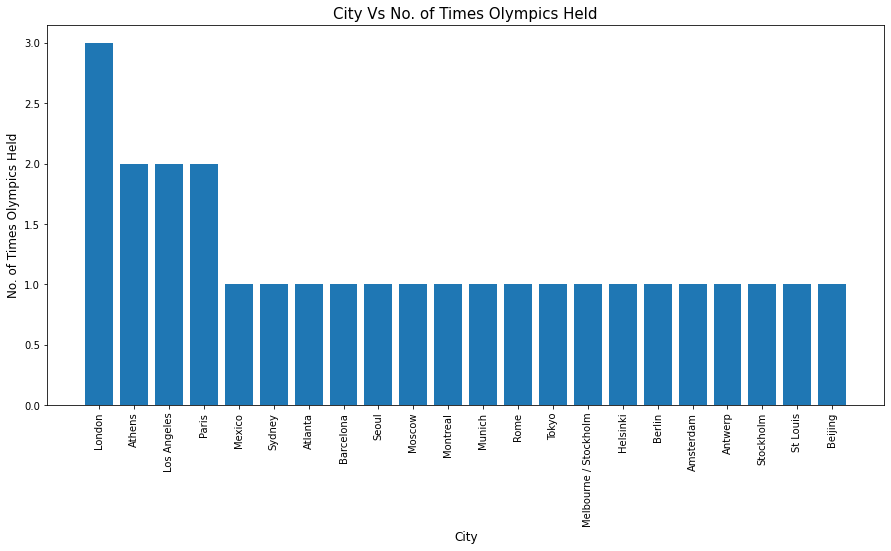

In [18]:
plt.figure(figsize=(15,7))
plt.bar(data['City'],data['No. of held'])
plt.title('City Vs No. of Times Olympics Held',fontsize=15)
plt.xlabel('City',fontsize=12)
plt.ylabel('No. of Times Olympics Held',fontsize=12)
plt.xticks(rotation=90)

## 2. Which sport is having most number of Gold Medals so far? (Top 5)


Top-5 sports having most number of Gold Medals

         Sport  No. of gold
0     Aquatics         1421
1    Athletics         1215
17      Rowing          890
4   Gymnastics          820
3      Fencing          552


Text(0, 0.5, 'No. of Golds')

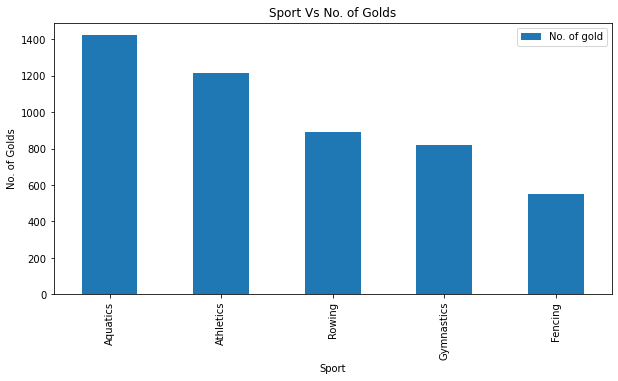

In [19]:
data = []

for sport in df['Sport'].unique():
    data.append([sport , len(df[(df['Sport'] == sport) & (df['Medal'] == "Gold")])])
plot_data = pd.DataFrame(data,columns = ['Sport','No. of gold']).sort_values(by='No. of gold', ascending=False).head()

print("Top-5 sports having most number of Gold Medals\n")
print(plot_data)
plot_data.plot(x = 'Sport', y = 'No. of gold', kind = 'bar', figsize = (10,5))
plt.title('Sport Vs No. of Golds')
plt.ylabel('No. of Golds')

## 3. Which sport is having most number of medals so far? (Top 5)


Top-5 sports having most number of Medals

         Sport  No. of medals
0     Aquatics           4170
1    Athletics           3637
17      Rowing           2667
4   Gymnastics           2307
3      Fencing           1613


Text(0, 0.5, 'No. of Medals')

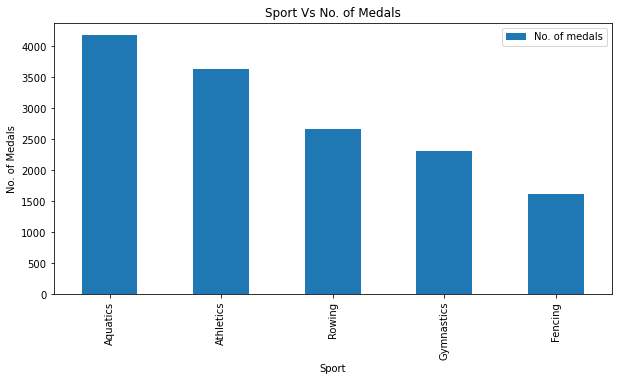

In [20]:
data = []

for sport in df1['Sport'].unique():
    data.append([sport , len(df1[(df1['Sport'] == sport)])])
plot_data = pd.DataFrame(data,columns = ['Sport','No. of medals']).sort_values(by='No. of medals', ascending=False).head()

print("Top-5 sports having most number of Medals\n")
print(plot_data)
plot_data.plot(x = 'Sport', y = 'No. of medals', kind = 'bar', figsize = (10,5))
plt.title('Sport Vs No. of Medals')
plt.ylabel('No. of Medals')

## 4. Which player has won most number of medals? (Top 5)


Top-5 Players having most number of Medals

                  Athlete  No. of medals
18640     PHELPS, Michael             22
7197     LATYNINA, Larisa             18
9948   ANDRIANOV, Nikolay             15
7201      SHAKHLIN, Boris             13
6591         ONO, Takashi             13


Text(0, 0.5, 'No. of Medals')

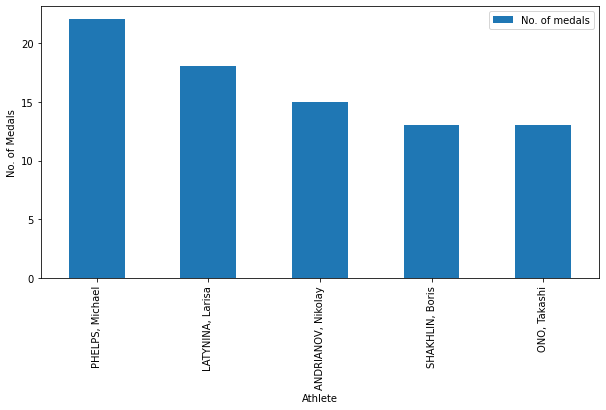

In [21]:
data = []

for athlete in df1['Athlete'].unique():
    data.append([athlete , len(df1[(df1['Athlete'] == athlete)])])
plot_data = pd.DataFrame(data,columns = ['Athlete','No. of medals']).sort_values(by='No. of medals', ascending=False).head()

print("Top-5 Players having most number of Medals\n")
print(plot_data)
plot_data.plot(x = 'Athlete', y = 'No. of medals', kind = 'bar', figsize = (10,5))
plt.ylabel('No. of Medals')

## 5. Which player has won most number Gold Medals of medals? (Top 5)


Top-5 Players having most number of Gold Medals

                Athlete  No. of gold medals
18640   PHELPS, Michael                  18
2262       NURMI, Paavo                   9
8811        SPITZ, Mark                   9
12468       LEWIS, Carl                   9
7197   LATYNINA, Larisa                   9


Text(0, 0.5, 'No. of Gold Medals')

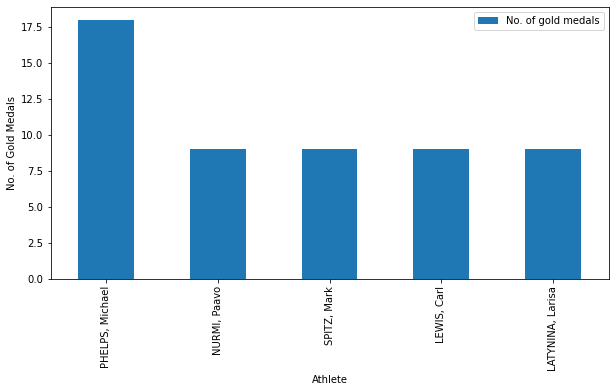

In [22]:
data = []

for athlete in df['Athlete'].unique():
    data.append([athlete , len(df1[(df1['Athlete'] == athlete) & (df1['Medal'] == "Gold")])])
plot_data = pd.DataFrame(data,columns = ['Athlete','No. of gold medals']).sort_values(by='No. of gold medals', ascending=False).head()

print("Top-5 Players having most number of Gold Medals\n")
print(plot_data)
plot_data.plot(x = 'Athlete', y = 'No. of gold medals', kind = 'bar', figsize = (10,5))
plt.ylabel('No. of Gold Medals')

As we can see that PHELPS, Michael won most number of Gold medals which is 18

## 6. In which year India won first Gold Medal in Summer Olympics?


India won Gold Medal in Summer Olympics

    Year  Gold
0   1896     0
1   1900     0
2   1904     0
3   1908     0
4   1912     0
5   1920     0
6   1924     0
7   1928    15
8   1932    11
9   1936    19
10  1948    20
11  1952    14
12  1956    17
13  1960     0
14  1964    15
15  1968     0
16  1972     0
17  1976     0
18  1980    16
19  1984     0
20  1988     0
21  1992     0
22  1996     0
23  2000     0
24  2004     0
25  2008     1
26  2012     0


<AxesSubplot:xlabel='Year'>

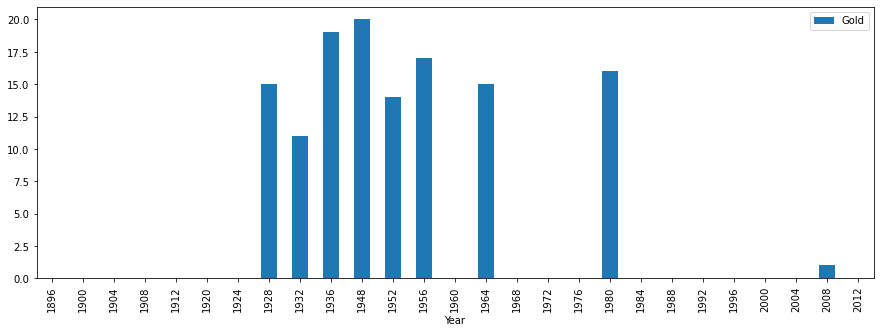

In [23]:
data = []
for year in df1['Year'].unique():
    data.append([year , len(df1[(df1['Year'] == year) & (df1['Medal'] == "Gold") & (df1['Country'] == "IND")])])
plot_data = pd.DataFrame(data,columns = ['Year','Gold']).sort_values(by='Year', ascending=True)

print("India won Gold Medal in Summer Olympics\n")
print(plot_data)
plot_data.plot(x = 'Year', y = 'Gold', kind = 'bar', figsize = (15,5))

As we can see that in 1928 india won its first gold medal in olympics not only one but also 15 gold medals india won in this year

## 7. Which event is most popular in terms on number of players? (Top 5)


Top-5 most popular events in terms on number of players 

                Event  Athletes
80           Football      1497
176            Hockey      1422
138  Team Competition      1147
327        Basketball      1012
337          Handball       973


Text(0, 0.5, 'No. of Players')

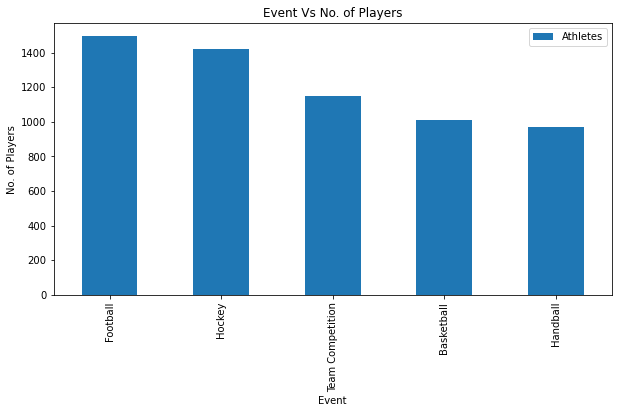

In [24]:
data = []
for event in df1['Event'].unique():
    data.append([event , len(df1[(df1['Event'] == event)])])
plot_data = pd.DataFrame(data,columns = ['Event','Athletes']).sort_values(by='Athletes', ascending=False).head()

print("Top-5 most popular events in terms on number of players \n")
print(plot_data)
plot_data.plot(x = 'Event', y = 'Athletes', kind = 'bar', figsize = (10,5))
plt.title('Event Vs No. of Players')
plt.ylabel('No. of Players')

## 8. Which sport is having most female Gold Medalists? (Top 5)


Top-5 Sport that having most female Gold Medalists

         Sport  No of female Gold Medalist
0     Aquatics                         589
1    Athletics                         388
4   Gymnastics                         268
17      Rowing                         217
35  Volleyball                         166


Text(0, 0.5, 'No. of Female Gold Medalist')

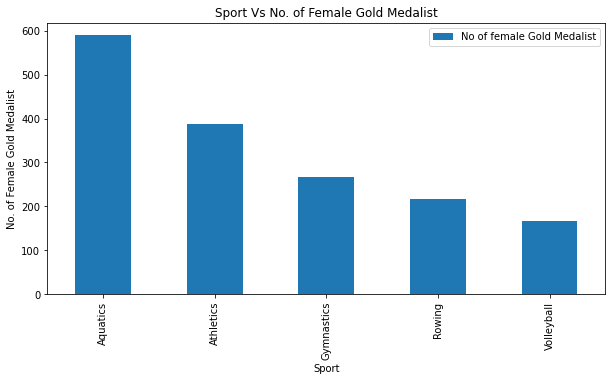

In [25]:
data = []
for sport in df1['Sport'].unique():
    data.append([sport , len(df1[(df1['Sport'] == sport) & (df1['Medal'] == "Gold") & (df1['Gender'] == "Women")])])
plot_data = pd.DataFrame(data,columns = ['Sport','No of female Gold Medalist']).sort_values(by='No of female Gold Medalist', ascending=False).head()

print("Top-5 Sport that having most female Gold Medalists\n")
print(plot_data)
plot_data.plot(x = 'Sport', y = 'No of female Gold Medalist', kind = 'bar', figsize = (10,5))
plt.title('Sport Vs No. of Female Gold Medalist')
plt.ylabel('No. of Female Gold Medalist')